In [1]:
from simulation import *
from aesthetics import *
from models import *
from data import *

import glob
import os as os
import re as re
import pandas as pd

%reload_ext autoreload
%autoreload 2
%matplotlib inline
mpl.rc('text', usetex=True)

In [2]:
df = pd.DataFrame()
hiv_dir = '../../md-data/hiv-protease/'
hiv_unbound_files = sorted(glob.glob(hiv_dir + '1hhp_apo/' + '*'))

for file in range(len(hiv_unbound_files)):
    name = os.path.splitext(os.path.basename(hiv_unbound_files[file]))[0]
    name = re.search('^[^_]*', name).group(0)
    this = simulation(data_source='hiv_md_data')
    this.name = name
    this.simulate()
    flux_with_catalysis = np.mean(this.flux_u + this.flux_b)
    flux_with_catalysis_std = np.std(this.flux_u + this.flux_b)

    this.catalytic_rate = 0
    this.simulate()
    flux_without_catalysis = np.mean(this.flux_u + this.flux_b)
    flux_without_catalysis_std = np.std(this.flux_u + this.flux_b)

    df = df.append(pd.DataFrame({'Flux with catalysis': flux_with_catalysis,
                            'Flux with catalysis Std': flux_with_catalysis_std,
                            'Flux without catalysis': flux_without_catalysis,
                            'Flux without catalysis Std': flux_without_catalysis_std,
                            'File': name,
                            'Ratio': flux_with_catalysis / flux_without_catalysis,
                            }, index=[0]), ignore_index=True)

In [3]:
df.sort_values(by='Flux with catalysis', ascending=False).head()

File  Flux with catalysis  Flux with catalysis Std  \
972    psiLYS55             0.163897                 0.318566   
422  chi5ARG113             0.151672                 0.232304   
921   psiILE149             0.036450                 0.050750   
991    psiPRO63             0.033929                 0.056050   
726   phiILE153             0.026405                 0.044208   

     Flux without catalysis  Flux without catalysis Std      Ratio  
972               -0.048433                    0.189754  -3.383976  
422                0.096810                    0.362856   1.566703  
921               -0.004945                    0.048348  -7.370389  
991                0.001452                    0.016743  23.361994  
726                0.001279                    0.011925  20.641316

In [5]:
total_angles = len(df)
some_flux = len(df[df['Flux with catalysis'] > 0.1])
print('{} / {}'.format(some_flux, total_angles))

2 / 1031


# Investigate psiLYS55

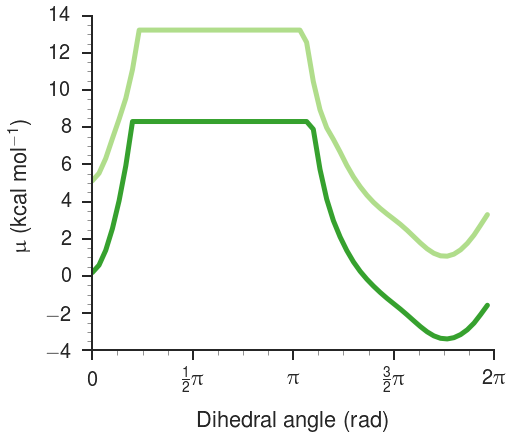

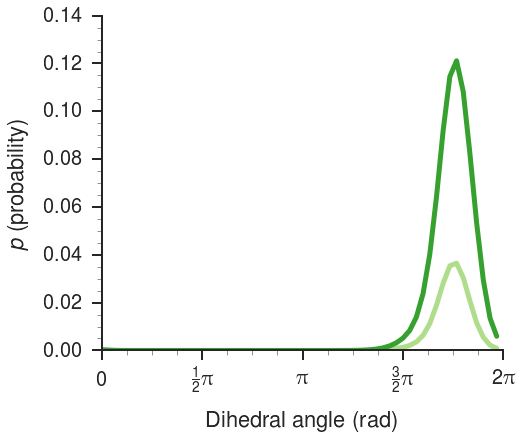

C_intrasurface = 	8.33e+10 second**-1
D = 			3.00e+12 degrees**2 second**-1
C_intersurface = 	1.00e+09 mol**-1 second**-1
Catalytic rate = 	0.3 second**-1
ATP concentration = 	0.002 M
Time step = 		1.00e-12 second


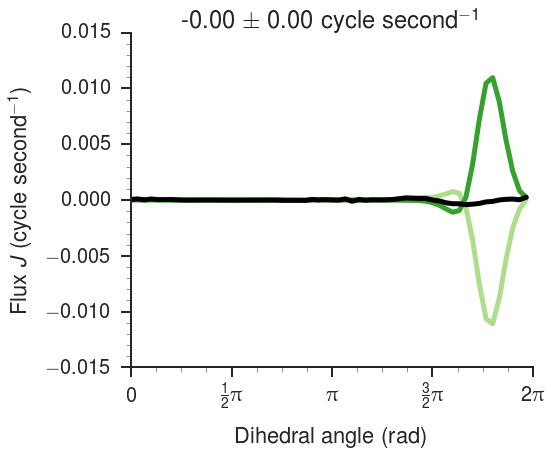

In [52]:
this = simulation(data_source='hiv_md_data')
this.name = 'psiMET145'
# this.load = True
# this.load_slope = -2
this.simulate(plot=True)
# this.plot_load()
#this.plot_load_extrapolation()
# this.plot_flux()

In [46]:
this.unbound_population

array([  2.90000000e-04,   3.40000000e-05,   2.00000000e-06,
         2.00000000e-06,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         6.00000000e-06,   2.00000000e-06,   2.80000000e-05,
         8.40000000e-05,   2.60000000e-04,   5.40000000e-04,
         1.23400000e-03,   2.08400000e-03,   3.46200000e-03,
         5.55000000e-03,   8.34200000e-03,   1.36760000e-02,
         2.42300000e-02,

In [48]:
this.bound_population

array([  5.94000000e-04,   7.80000000e-05,   4.00000000e-06,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   8.00000000e-06,   2.60000000e-05,
         1.06000000e-04,   2.80000000e-04,   6.22000000e-04,
         1.16600000e-03,   2.11800000e-03,   3.62600000e-03,
         6.05600000e-03,   9.16000000e-03,   1.52280000e-02,
         2.62900000e-02,

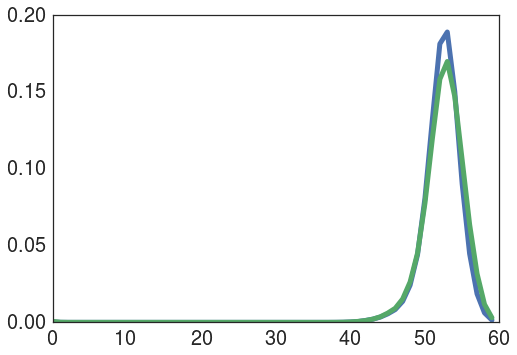

In [50]:
plt.plot(this.unbound_population)
plt.plot(this.bound_population)